In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  , classification_report , roc_curve, auc


In [7]:
df=pd.read_csv('./train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df.fillna(' ',inplace=True)
df['content']=df['title']+' '+df['author']

In [12]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [13]:
port_stem=PorterStemmer()

In [14]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [15]:
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [16]:
df['content']= df['content'].apply(stemming)

In [19]:
df['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

In [20]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)

In [21]:
targets = df['label'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.2, random_state=69)

In [23]:
print(f" X_train shape: {X_train.shape[0]}")
print(f"X_test shape: {X_test.shape[0]}")

 X_train shape: 16640
X_test shape: 4160


Training accuracy of Decision Tree is 0.9964543269230769
testing accuracy of Decision Tree is 0.9932692307692308
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2051
           1       0.99      0.99      0.99      2109

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



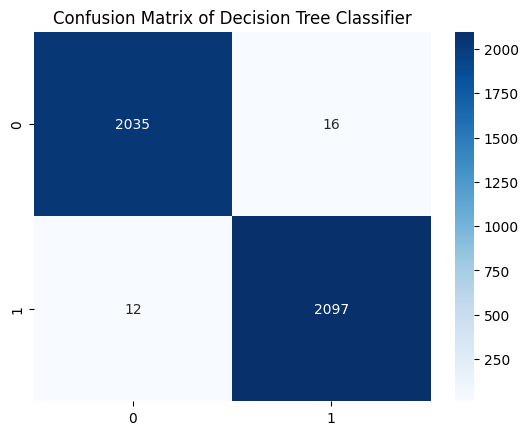

In [48]:
model=DecisionTreeClassifier(max_depth=50,random_state=69)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of Decision Tree is {model.score(X_train,y_train)}")
print(f"testing accuracy of Decision Tree is {model.score(X_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()




Training accuracy of Multnomial Naive Bayes is 0.9879807692307693
testing accuracy of Multnomial Naive Bayes is 0.9569711538461538
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2051
           1       1.00      0.92      0.96      2109

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



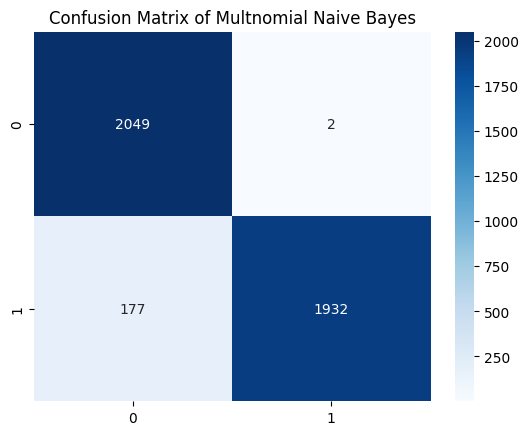

In [43]:
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of Multnomial Naive Bayes is {model.score(X_train,y_train)}")
print(f"testing accuracy of Multnomial Naive Bayes is {model.score(X_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Multnomial Naive Bayes")
plt.show()


Training accuracy of SVM is 0.9996394230769231
testing accuracy of SVC is 0.9927884615384616
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2051
           1       0.99      1.00      0.99      2109

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



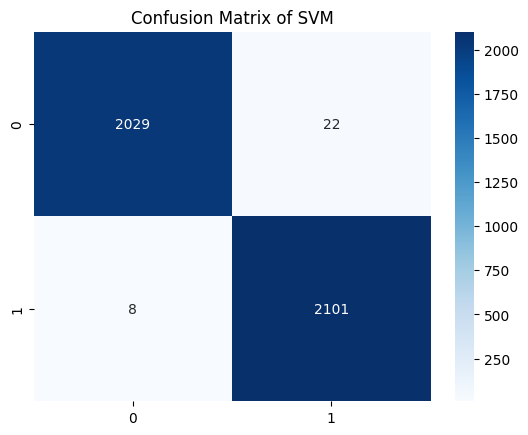

In [46]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of SVM is {model.score(X_train,y_train)}")
print(f"testing accuracy of SVC is {model.score(X_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of SVM")
plt.show()
